Sole work of Eliot Austin-Forbes, 2020


In [1]:
import pandas as pd
import numpy as np

# Load df:
df = pd.read_csv('profiles.csv')

# List of column labels
column_names = df.columns.values

# Generate overview of csv data, including object types and number of non-null values:
def csv_overview(df, column_names):
    print(f'There are {len(df)} users within the data')
    print(f'For which there are {len(column_names)} features:')

    dash = '-' * 63

    print(dash)

    for i in range(len(column_names)):
        if df.dtypes[column_names[i]] == int:
            print( '{:<15}{:<25}{}'.format(column_names[i], 
                                           f'int range: {min(df[column_names[i]])} to {max(df[column_names[i]])}', 
                                           f'non-null values: {df[column_names[i]].count()}'))
        elif df.dtypes[column_names[i]] == 'O':
            print( '{:<15}{:<25}{}'.format(column_names[i], 'string', f'non-null values: {df[column_names[i]].count()}'))
        
# Execute
csv_overview(df, column_names)

There are 59946 users within the data
For which there are 31 features:
---------------------------------------------------------------
body_type      string                   non-null values: 54650
diet           string                   non-null values: 35551
drinks         string                   non-null values: 56961
drugs          string                   non-null values: 45866
education      string                   non-null values: 53318
essay0         string                   non-null values: 54458
essay1         string                   non-null values: 52374
essay2         string                   non-null values: 50308
essay3         string                   non-null values: 48470
essay4         string                   non-null values: 49409
essay5         string                   non-null values: 49096
essay6         string                   non-null values: 46175
essay7         string                   non-null values: 47495
essay8         string                   non-nu

In [2]:
# Select only columns of interest
df_clean = df.copy()
df_clean = df_clean[['age', 'body_type', 'diet', 'drinks', 'education', 'ethnicity', 'orientation', 'sex']]

In [3]:
# Examine possible responses for each column
for column in df_clean.columns:
    if column != 'age':
            print(df[column].value_counts())

average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64
mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly kosher           18
strictly halal            18
kosher                    11
halal                     11
Name: diet, dtype: int64
socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: dri

In [4]:
'''Data Cleaning'''

# Drop all nas
df_clean.dropna(inplace=True)

# Remap age, diet, education, body_type and ethnicity to a few basic categories:
df_clean['diet'] = df_clean['diet'].apply(lambda x: 'anything' if 'anything' in str(x) else 
                              ('vegetarian' if 'vegetarian' in str(x) else 
                               ('vegan' if 'vegan' in str(x) else 'to drop')))
df_clean = df_clean[df_clean['diet'] != 'to drop'] # Eliminate everything outside of 'anything', 'vegeterian' and 'vegan'

df_clean['education'] = df_clean['education'].apply(lambda x: 
                                        'grad school' if 'ph.d' in str(x) or 'masters' in str(x) or 
                                        'medicine' in str(x) or 'law' in str(x) else # Counting medicine/law as grad school
                                        ('college' if 'college' in str(x) or 'university' in str(x) else 
                                         'highschool'))
                               
# A Lambda comprehension method is not required when the values are more discrete:
df_clean['body_type'].replace({'jacked': 'athletic', 'fit': 'athletic', 'skinny': 'thin', 
                         'curvy': 'slightly overweight', 'a little extra': 'slightly overweight', 
                         'full figured': 'slightly overweight'}, 
                        inplace=True)

# Remove rows with less than 5% of the population and/or bring the number of possible responses to above five:
df_clean = df_clean[df_clean["body_type"] != "used up"] # Do not include the 'used up' body_type (it is ambiguous).
df_clean = df_clean[df_clean["body_type"] != "rather not say"] # This is effectively a null value.
                               
# There are 211 ethnicities in the data                               
simple_ethnicities = ['white', 'asian', 'hispanic / latin', 'black', 'other'] 
# Condense them into five ethnicities:
df_clean = df_clean[df_clean['ethnicity'].isin(simple_ethnicities)]


In [5]:
csv_overview(df, df.columns)
csv_overview(df_clean, df_clean.columns) #Approximately half of the data has been cut during cleaning

There are 59946 users within the data
For which there are 31 features:
---------------------------------------------------------------
body_type      string                   non-null values: 54650
diet           string                   non-null values: 35551
drinks         string                   non-null values: 56961
drugs          string                   non-null values: 45866
education      string                   non-null values: 53318
essay0         string                   non-null values: 54458
essay1         string                   non-null values: 52374
essay2         string                   non-null values: 50308
essay3         string                   non-null values: 48470
essay4         string                   non-null values: 49409
essay5         string                   non-null values: 49096
essay6         string                   non-null values: 46175
essay7         string                   non-null values: 47495
essay8         string                   non-nu

In [6]:
# Generate pie chart method:

from matplotlib import pyplot as plt
def pie_charts_gen(df, skipped_column=False):
    df_pie = df.copy() #Generate deepcopy for manipulation at will
    columns = df_pie.columns.values
    if skipped_column:
        columns = np.delete(columns, np.where(columns==skipped_column)) # This is for future dataframes where we will be looking at all features
                                                                        # except one in particular
            
    for column in columns: # Iterate through columns
        
        if column == 'age': # Categorize ages into general intervals for ease of viewing
            df_pie['age'] = df_pie['age'].apply(lambda x: 
                            '18-24' if x > 17 and x < 25 else 
                           ('25-32' if x > 24 and x < 33 else
                           ('33-40' if x > 32 and x < 41 else
                           ('41-50' if x > 40 and x < 51 else '50+'))))

        counties = df_pie[column].value_counts().to_dict() # Count all values for respective column as a dictionary
        
        # Order columns
        if column == 'age':
            desired_order = ['18-24', '25-32', '33-40', '41-50', '50+']
        elif column == 'body_type':
            desired_order = ['athletic', 'thin', 'average', 'slightly overweight', 'overweight'] #In order of body fat
        elif column == 'diet':
            desired_order = ['anything', 'vegetarian', 'vegan']
        elif column == 'drinks':
            desired_order = ['not at all', 'rarely', 'socially', 'often', 'very often', 'desperately']
        elif column == 'education':
            desired_order = ['college', 'highschool', 'grad school']
        elif column == 'ethnicity':
            desired_order = ['white', 'asian', 'hispanic / latin', 'black', 'other']
        elif column == 'orientation':
            desired_order = ['straight', 'gay', 'bisexual']
        elif column == 'sex':
            desired_order = ['m', 'f']
        
        '''for x in desired_order: # This fixes a problem where the method will return an error if one of the responses in desired_order is not present
            if counties[x] != 0:  # within the dataframe.
                counts = {x: counties[x]}'''
        for x in desired_order:
            if x not in counties:
                desired_order.pop(x)
                
        counts = {x: counties[x] for x in desired_order}
        
        # Too few people are under 'desperately' to be counted
        if column == 'drinks':
            counts[''] = counts.pop('desperately')
        
        labels = [key for key in counts.keys()]
        sizes = [value for value in counts.values()]  
        
        colors = ['magenta', 'springgreen', 'cyan', 'orangered', 'yellow', 'b']
        explode = tuple([0.1] + [0] * (len(counts)-1))
        plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=100)
        plt.title(column, pad=15, size=18)

        plt.axis('equal')
        plt.show()

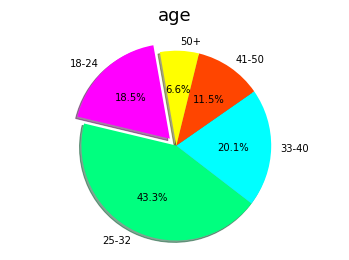

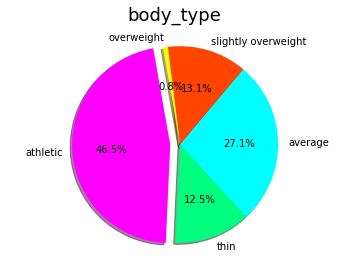

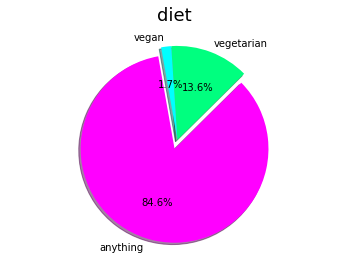

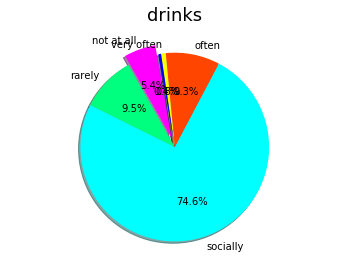

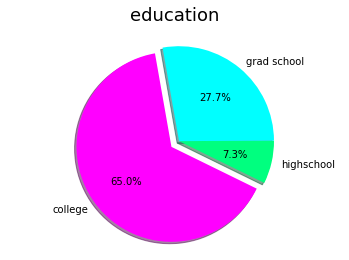

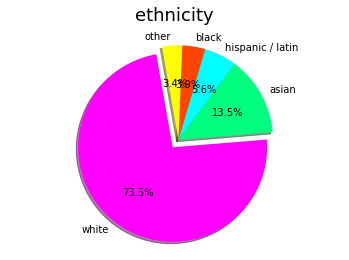

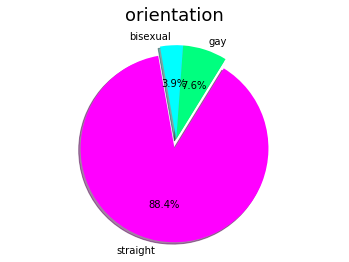

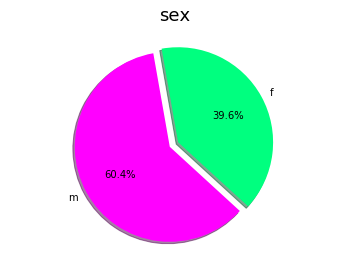

In [7]:
# Call method to examine pie charts for every column
pie_charts_gen(df_clean)

In [8]:
'''Numerating Labels'''

df_cleaned_numerated = df_clean.replace({'not at all': 0, 'rarely': 1, 'socially': 2, 'often': 3, 'very often': 4, 'desperately': 5, #drinks
                                 'athletic': 0, 'thin': 1, 'average': 2, 'slightly overweight': 3, 'overweight': 4, # body_type
                                 'anything': 0, 'vegetarian': 1, 'vegan': 2, # diet
                                 'highschool': 0, 'college': 1, 'grad school': 2, #education
                                 'white': 0, 'asian': 1, 'hispanic / latin': 2, 'black': 3, 'other': 4, #ethnicity
                                 'straight': 0, 'bisexual': 1, 'gay': 2, #orientation
                                 'm': 0, 'f': 1 #sex 
                                        })

In [9]:
# Select features and labels of interest
df_drinkinghabits_features = df_cleaned_numerated[['body_type', 'diet', 'education', 'ethnicity', 'orientation', 'sex']]
series_drinkinghabits_labels = df_cleaned_numerated['drinks']

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def KNeighbors(features, labels): #Pass in two DataFrames, features and labels, both in numerical formats
    
    #Preprocessing scaling
    min_max_scaler = MinMaxScaler() #Call a scalar instance to weigh features equally
    features_scaled = min_max_scaler.fit_transform(features) #Save result in a 'scaled' variable
    
    #Data splitting
    train_data, val_data, train_labels, val_labels = train_test_split(features_scaled, labels, test_size = 0.2, random_state = 100)
    
    #Optimal #neighbors to accuracy analysis
    accuracies = {}
    accuracy_rating = {}
    for i in range(1,20):   
        classifier = KNeighborsClassifier(n_neighbors=i)
        classifier.fit(train_data, train_labels)
        accuracies.update({i: classifier.score(val_data, val_labels)})
    max_key = max(accuracies)
    
    #Plot method
    lists = sorted(accuracies.items()) # sorted by key (first value is k=1 and so on), return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    plt.plot(x, y)
    plt.xlabel('#Neighbors')
    plt.ylabel('Accuracy Score (based on validation set)')
    plt.title("K-Nearest Neighbor Classifier for '" + labels.name + "'") # handily title the plot based on input
    plt.show()
    
    #Receive input for the optimal number of neighbors, should be based on elbow-curve validationa analysis:
    user_num_neighbors = int(input('Choose optimal #neighbors:'))
    
    #Perform fitting on the optimal classifier
    best_classifier = KNeighborsClassifier(n_neighbors=user_num_neighbors)
    best_classifier.fit(train_data, train_labels)
    predicted_labels = best_classifier.predict(val_data)
    
    #Return the prediction
    return best_classifier, predicted_labels, val_data, val_labels

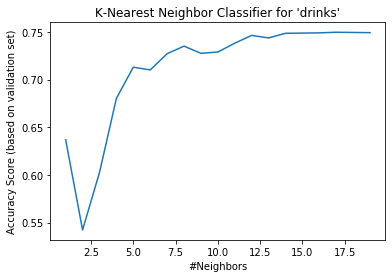

Choose optimal #neighbors: 15


In [63]:
#Call method and save the labels
drinkinghabits_classifier, predicted_drinkinghabits, test_drinkinghabits_data, true_drinkinghabits = KNeighbors(df_drinkinghabits_features, series_drinkinghabits_labels) 

In [59]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print('Precision:', 
            precision_score(predicted_drinkinghabits, true_drinkinghabits, 
            labels=[0,1,2,3,4,5], 
            average='macro', zero_division='warn'),
            '   averaging = macro')
'''
This is the same score as the accuracy when changed to MICRO averaging.
100% of the predicted data exists within the 'social' class label, so the precision score is 
entirely based off of the precision for one class.
If the total true positives (number of times the classifier correctly guessed 'social'), was 75,
then the total false positives (number of times the classifier incorrectly guessed 'social') would be 25. Making the same value as accuracy.
'''

print('Recall:   ',
            recall_score(predicted_drinkinghabits, true_drinkinghabits, 
            labels=[0,1,2,3,4,5], 
            average='macro', zero_division='warn'),
            '  averaging = macro')

'''
Recall is the same as accuracy when changed to MICRO averaging because the total false negatives is 25,
where each class other than 'socially' would contain the 25% of remaining samples after classification.
The classifier placed 0 samples within these other classes, therefore they are counted as false negatives (incorreclty
labelled as 'socially') and the total false negatives is 25.
'''

print('f1:       ', 
            f1_score(predicted_drinkinghabits, true_drinkinghabits, 
            average='macro'),
            '  averaging = macro')

Precision: 0.1677438579691348    averaging = macro
Recall:    0.23615723316852386   averaging = macro
f1:        0.14548892834732188   averaging = macro


In [13]:
# Organize data for plotting of predicted drinking habits from validation features:
dic_drinking_actual = df_clean['drinks'].value_counts().to_dict()
desired_order = ['not at all', 'rarely', 'socially', 'often', 'very often', 'desperately']
dic_drinking_actual = {k: dic_drinking_actual[k] for k in desired_order}

dic_drinking_predictions = {'not at all': 0, 'rarely': 0, 'socially': 0, 'often': 0, 'very often': 0, 'desperately': 0}
for i in range(len(predicted_drinkinghabits)):
    if predicted_drinkinghabits[i] == 0:
        dic_drinking_predictions['not at all'] += 1
    elif predicted_drinkinghabits[i] == 1:
        dic_drinking_predictions['rarely'] += 1
    elif predicted_drinkinghabits[i] == 2:
        dic_drinking_predictions['socially'] += 1
    elif predicted_drinkinghabits[i] == 3:
        dic_drinking_predictions['often'] += 1
    elif predicted_drinkingnabits[i] == 4:
        dic_drinking_predictions['very often'] += 1
    elif predicted_drinkinghabits[i] == 5:
        dic_drinking_predictions['desperately'] += 1

print(dic_drinking_actual)
print(dic_drinking_predictions)

{'not at all': 1221, 'rarely': 2152, 'socially': 16892, 'often': 2096, 'very often': 181, 'desperately': 101}
{'not at all': 3, 'rarely': 9, 'socially': 4517, 'often': 0, 'very often': 0, 'desperately': 0}


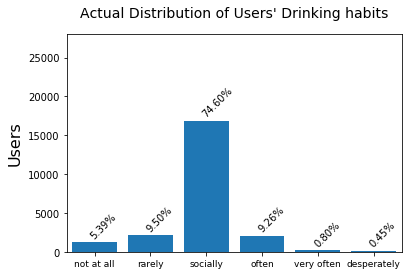

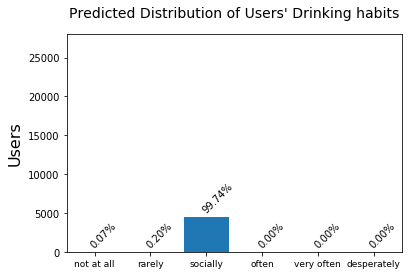

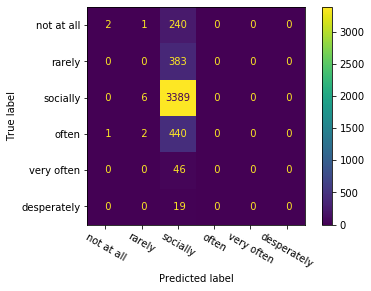

In [79]:
import matplotlib.ticker as ticker
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter
from sklearn.metrics import plot_confusion_matrix

# Method to annotate bars with percentage of total sample
def get_percentage(data, y_coord):
    total = 0
    for count in data.values():
        total += count
    percentage = (y_coord/total) * 100
    return '{:0.2f}%'.format(percentage)

# Plot method
def plot_distributions(data, title):
#def plot_distributions(data, title, proportional_y_range):
    plt.bar(data.keys(), list(data.values()), align='center')
    ax = plt.gca() # Get axes
    plt.xlim([-0.5, len(data)-0.5])   
    '''
    if proportional_y_range:
    #Scale the y axis appropriately:
        plt.ylim([0, max(data.values()) + 0.5*max*data.values()])
    else:
    '''
    plt.ylim([0, 28000])
    plt.title(title, size = 14, x = 0.5, y=1.05)
    plt.ylabel('Users', labelpad=6, size=16)
    plt.setp(ax.xaxis.get_minorticklabels(), rotation=350) # Rotate so that the labels don't overlap
    ax.tick_params(axis='x', which='major', labelsize=9) # Remove the minor tick marks as they are unhelpful
    
    for i in range(len(data)):
        x_coord = i-0.1
        y_coord = list(data.values())[i]
        annotation = get_percentage(data, y_coord)
        plt.annotate(annotation, (x_coord, y_coord + 500), rotation=45)

plot_distributions(dic_drinking_actual, "Actual Distribution of Users' Drinking habits")
plot_distributions(dic_drinking_predictions, "Predicted Distribution of Users' Drinking habits")
plot_confusion_matrix(drinkinghabits_classifier, 
                      test_drinkinghabits_data, 
                      true_drinkinghabits, 
                      values_format = '3d',
                      display_labels = ['not at all','rarely', 'socially', 'often', 'very often', 'desperately'], 
                      xticks_rotation=330)
plt.show()

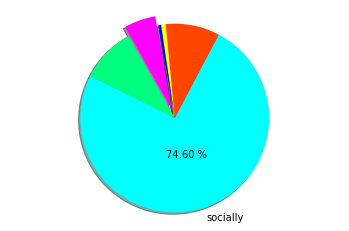

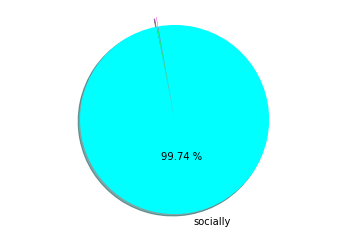

In [15]:
def my_autopct(pct):
    return ('%.2f %%' % pct) if pct > 20 else ''
    
def pie_chart(dic):
    if 'socially' in dic.keys():
        labels = ['','','socially','','','']
    else:
        labels = dic.keys()
    sizes = [value for value in dic.values()]  
    colors = ['magenta', 'springgreen', 'cyan', 'orangered', 'yellow', 'b']
    explode = tuple([0.1] + [0] * (len(dic)-1))
    pie_chart = plt.pie(sizes, explode=explode, labels=labels, colors=colors, labeldistance = 1.1,
    autopct=my_autopct, pctdistance=0.4, shadow=True, startangle=100)

    plt.axis('equal')
    plt.show()

pie_chart(dic_drinking_actual)
pie_chart(dic_drinking_predictions)

Note that the classifier just decides that always guessing 'socially' might be the best option.
Try instead to determine sex based on the same factors:

In [16]:
series_sex_labels = df_cleaned_numerated['sex']
df_sex_features = df_cleaned_numerated.drop(columns='sex')

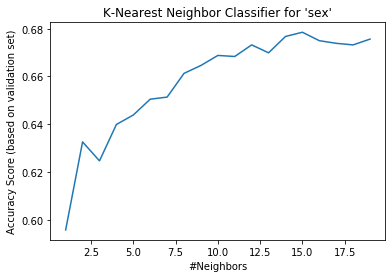

Choose optimal #neighbors: 15


In [80]:
sex_classifier, predicted_sex, sex_val_data, true_sex = KNeighbors(df_sex_features, series_sex_labels)

In [18]:
dic_sex_actual = df_clean['sex'].value_counts().to_dict()

dic_sex_predictions = {'m': 0, 'f': 0}
for i in range(len(predicted_sex)):
    if predicted_sex[i] == 0:
        dic_sex_predictions['m'] += 1
    elif predicted_sex[i] == 1:
        dic_sex_predictions['f'] += 1
        
print(dic_sex_actual)
print(dic_sex_predictions)

{'m': 13681, 'f': 8962}
{'m': 3308, 'f': 1221}


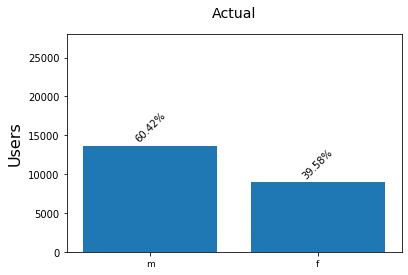

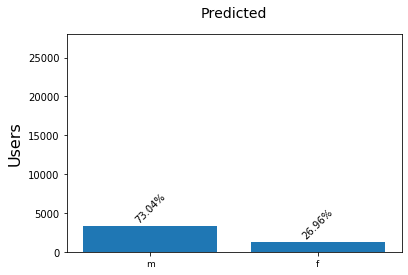

In [19]:
plot_distributions(dic_sex_actual, 'Actual')
plot_distributions(dic_sex_predictions, 'Predicted')

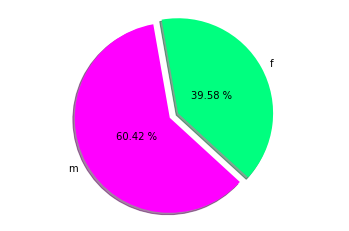

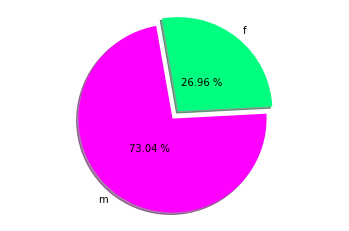

In [20]:
pie_chart(dic_sex_actual)
pie_chart(dic_sex_predictions)

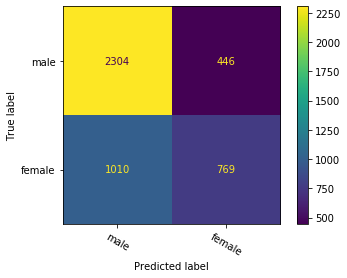

In [82]:
plot_confusion_matrix(sex_classifier, 
                      sex_val_data, 
                      true_sex, 
                      values_format = '3d',
                      display_labels = ['male','female'], 
                      xticks_rotation=330)
plt.show()

In [21]:
print('Accuracy: ',     
                    accuracy_score(true_sex, predicted_sex))

print('Precision:',     
                    precision_score(true_sex, predicted_sex, pos_label=0,
                    average='binary'),
                    'positive label = male')
print('Recall:   ', 
                    recall_score(true_sex, predicted_sex, pos_label=0,
                    average='binary'),
                    'positive label = male')
print('F1:       ',     
                    f1_score(true_sex, predicted_sex, average='binary'),
                    '             positive label = male')

Accuracy:  0.6780746301611835
Precision: 0.6952841596130592 positive label = male
Recall:    0.8363636363636363 positive label = male
F1:        0.514              positive label = male


In [24]:
df_males = df_clean.loc[df_clean['sex'] == 'm']
df_females = df_clean.loc[df_clean['sex'] == 'f']
print(df_females['body_type'].value_counts())
dic_females_body_types = df_females['body_type'].value_counts().to_dict()
print(df_males['body_type'].value_counts())
dic_males_body_types = df_males['body_type'].value_counts().to_dict()
#pie_charts_gen(df_males)
#pie_charts_gen(df_females)

df_sex_pred = pd.DataFrame({'Predicted Sex': predicted_sex}) # New DataFrame consisting of predicted gender
indexes_predicted_males = df_sex_pred.index[df_sex_pred['Predicted Sex'] == 0].tolist() # Take index values of samples predicted male
indexes_predicted_females = df_sex_pred.index[df_sex_pred['Predicted Sex'] == 1].tolist() # Take index values of samples predicted female
df_predicted_males = df_clean.iloc[indexes_predicted_males,:] # Take all samples predicted as male from original data
df_predicted_females = df_clean.iloc[indexes_predicted_females, :] # Take all samples predicted as female from original data
#pie_charts_gen(df_predicted_males)
#pie_charts_gen(df_predicted_females)

athletic               3039
average                2389
slightly overweight    2128
thin                   1349
overweight               57
Name: body_type, dtype: int64
athletic               7490
average                3746
thin                   1480
slightly overweight     841
overweight              124
Name: body_type, dtype: int64


In [25]:
df_females = df_clean.loc[df_clean['sex'] == 'f']
df_males = df_clean.loc[df_clean['sex'] == 'm']
print(df_females['body_type'].value_counts())
dic_females_body_types = df_females['body_type'].value_counts().to_dict()
print(df_males['body_type'].value_counts())
dic_males_body_types = df_males['body_type'].value_counts().to_dict()

athletic               3039
average                2389
slightly overweight    2128
thin                   1349
overweight               57
Name: body_type, dtype: int64
athletic               7490
average                3746
thin                   1480
slightly overweight     841
overweight              124
Name: body_type, dtype: int64


It would be useful to check other classification methods to see if the accuracy can be improved upon, namely decision tree classifications would be useful as we are working with discrete values on the labels in this case (SVMs and logistical regression would not work too well for our chosen features).

In [26]:
df_sex_features['age'] = df_sex_features['age'].apply(lambda x: 
                            0 if x > 17 and x < 25 else 
                           (1 if x > 24 and x < 33 else
                           (2 if x > 32 and x < 41 else
                           (3 if x > 40 and x < 51 else 4))))


In [27]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

train_data, test_data, train_labels, test_labels = train_test_split(df_sex_features, 
                                                                    series_sex_labels, 
                                                                    random_state = 100, 
                                                                    test_size=0.2)

accuracies = []
f1s = []
for i in range(2,21,2):
    forest = RandomForestClassifier(n_estimators = 200, random_state = 100, max_depth=i)
    forest.fit(train_data, train_labels)
    forest_predicted_sex = forest.predict(test_data)
    accuracies.append(accuracy_score(true_sex, forest_predicted_sex))
    f1s.append(f1_score(true_sex, forest_predicted_sex))

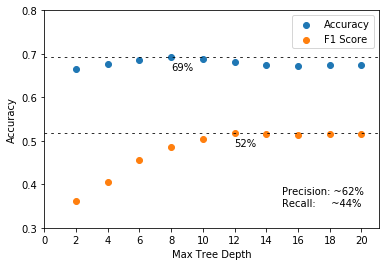

Accuracy:   0.6741002428792228
Precision:  0.6191974822974036
Recall:     0.4423833614390107
F1:         0.5160655737704918


In [29]:
plt.scatter(range(2,21,2), accuracies, label='Accuracy')
accuracy_max_value = max(accuracies)
accuracy_max_treedepth = 2+2*accuracies.index(accuracy_max_value)
plt.scatter(range(2,21,2), f1s, label='F1 Score')
f1_max_value = max(f1s)
f1_max_treedepth = 2+2*f1s.index(f1_max_value)
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Max Tree Depth')
plt.ylim(0.3, 0.8)
plt.xticks(np.arange(0,21,2))
plt.annotate('{:.0%}'.format(accuracy_max_value), (accuracy_max_treedepth, accuracy_max_value - 0.03))

plt.annotate(
'''- - - - - - - - - - - - - - - - - - - - - - - - \
- - - - - - - - - - - - - - - - - - - - - - - - - -''', 
             (0, accuracy_max_value - 0.005))

plt.annotate('{:.0%}'.format(f1_max_value), (f1_max_treedepth, f1_max_value -0.03))
plt.annotate('''- - - - - - - - - - - - - - - - - - - - - - - - \
- - - - - - - - - - - - - - - - - - - - - - - - - -''',  
             (0, f1_max_value - 0.005))

plt.annotate((f'''
Precision: ~{precision_score(true_sex, forest_predicted_sex):.0%}
Recall:     ~{recall_score(true_sex, forest_predicted_sex):.0%}'''),
            (15, 0.35))
plt.show()

forest = RandomForestClassifier(n_estimators = 200, random_state = 100, max_depth=20)
forest.fit(train_data, train_labels)
forest_predicted_sex = forest.predict(test_data)

print('Accuracy:  ', accuracy_score(true_sex, forest_predicted_sex))
print('Precision: ', precision_score(true_sex, forest_predicted_sex))
print('Recall:    ', recall_score(true_sex, forest_predicted_sex))
print('F1:        ', f1_score(true_sex, forest_predicted_sex))

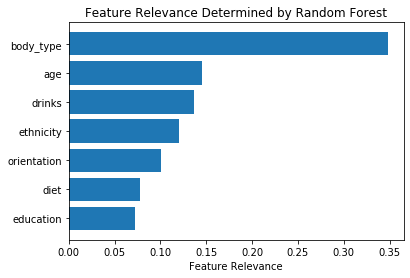

In [118]:
importances = dict(zip(df_sex_features.columns, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda item: item[1])}
plt.barh(list(importances.keys()), list(importances.values()))
plt.xlabel('Feature Relevance')
plt.title('Feature Relevance Determined by Random Forest')
plt.show()

0.6577552702861854
0.6578343048931284


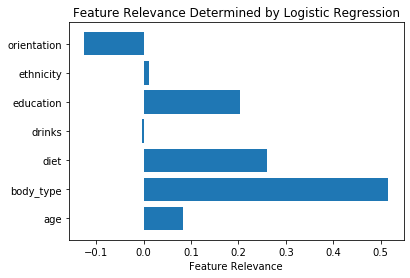

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix

df_sex_feature = df_cleaned_numerated.copy()
df_sex_feature.drop(labels='sex',axis=1,inplace=True)

x_train, x_test, y_train, y_test = train_test_split(df_sex_feature, series_sex_labels)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = LogisticRegression()
model.fit(x_train, y_train)

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))
x = model.coef_

coeffs = []
for item in x:
    for subitem in item:
        coeffs.append(subitem)
        
feature_to_coeff = dict(zip(df_sex_feature.columns, coeffs))

plt.barh(list(feature_to_coeff.keys()), list(feature_to_coeff.values()))
plt.xlabel('Feature Relevance')
plt.title('Feature Relevance Determined by Logistic Regression')
plt.show()

Test essays against gender:
We need:
1. Column with all essays condensed into one:

In [173]:
# Condense all essays into one column of the dataframe
df_essays = df.copy() # Copy original
# Generate new column with all essays
df_essays['all'] = df_essays['essay0'] \
                    + df_essays['essay1'] \
                    + df_essays['essay2'] \
                    + df_essays['essay3'] \
                    + df_essays['essay4'] \
                    + df_essays['essay5'] \
                    + df_essays['essay6'] \
                    + df_essays['essay7'] \
                    + df_essays['essay8']

df_essays = df_essays[['all','sex']]
df_essays.dropna(axis=0, inplace=True)

                                                     all sex
0      about me:<br />\n<br />\ni would love to think...   m
5      i'm an australian living in san francisco, but...   m
6      life is about the little things. i love to lau...   f
9      my names jake.<br />\ni'm a creative guy and i...   m
10     update: i'm seeing someone, so off the market ...   m
...                                                  ...  ..
59941  vibrant, expressive, caring optimist. i love b...   f
59942  i'm nick.<br />\ni never know what to write ab...   m
59943  hello! i enjoy traveling, watching movies, and...   m
59944  "all i have in this world are my balls and my ...   m
59945  is it odd that having a little "enemy" status ...   m

[31071 rows x 2 columns]


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

counter = CountVectorizer()
counts_test